# Clean And Analyze Employee Exit Surveys 

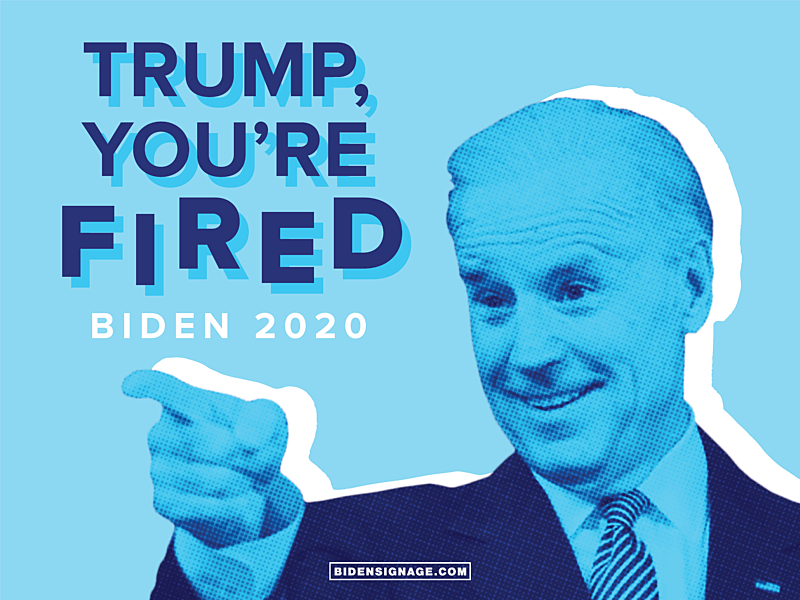

`The primary goal of this project - cleaning, combining and visualization data from two different datasets.`

In this work  we'll  analyze datasets of  exit surveys  from employees of the Department of Education, Training and Employment <a href="https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)" target="_blank">(DETE)</a> and the Technical and Further Education <a href="https://en.wikipedia.org/wiki/Technical_and_further_education" target="_blank">(TAFE)</a> institute in Queensland, Australia. You can find the datset for  DETE  exit survey <a href="https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey" target="_blank">here</a> and  dataset for the survey  TAFE   <a href="https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey" target="_blank">here</a>.


Majors goals of this project - pretend that I am a data analyst and I must provide 
the following summary information for stakeholders of these organization :

* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

They want us to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers. We'll aim to do most of the data cleaning and get you started analyzing the first question.

## 1. Importing and explore data

### Import data from csv.files and explore data for  dete_survey 


In [1]:
# Import required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Import cvs to dataframes 
dete_survey = pd.read_csv('data/dete_survey.csv')
tafe_survey = pd.read_csv('data/tafe_survey.csv')
# View head dete_survey
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [2]:
# Get info about dete_survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [3]:
dete_survey.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


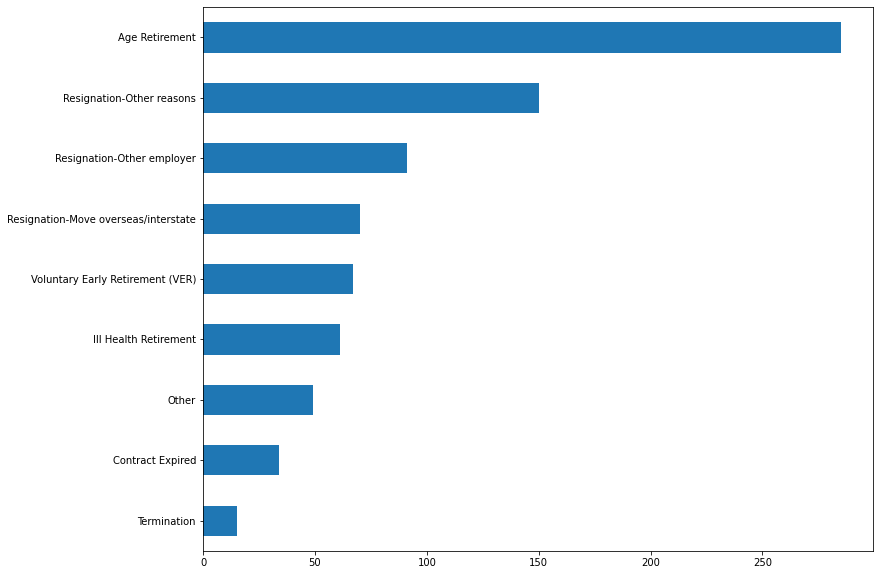

In [4]:
ax = dete_survey["SeparationType"].value_counts(sort=True, ascending=True).\
    plot(kind = 'barh', figsize=(12, 10), sort_columns = True)

### Explore tafe_survey

In [5]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [7]:
tafe_survey.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


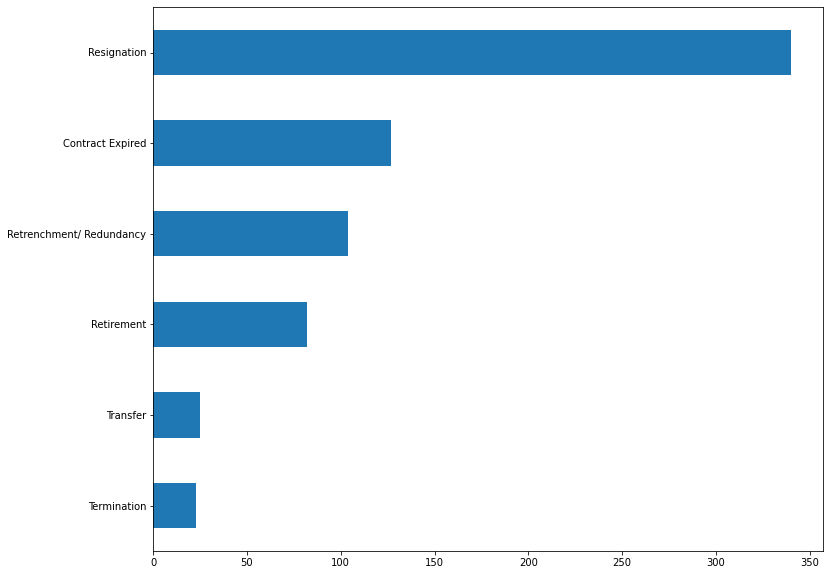

In [8]:
ax1 = tafe_survey["Reason for ceasing employment"].value_counts(sort=True, ascending=True).\
        plot(kind = 'barh', figsize=(12, 10), sort_columns = True)

### preliminary conclusion
* In dete_survey dataset  has cells contains  'Not Stated' value instead of Nan.
* Both datasets have essentially similar columns having the  different names.
* Both datasets have  a lot of unnecessary columns that unneeded for  analysis.
* Both datasets  are columns with several missing numbers that we have to remove.
* In general the dispersion of the causes of ceasing is almost the same.
* dete_survey have more gradation of ceasing reasons.

## 2.  Identify Missing Values and Drop Unnecessary Columns

### DETE 

Import  the dete_survey.csv file into pandas again and replace values 'Not Stated'  to the NaN and drop columns from 28 to 48 and get general information for cleaned dataset. 

In [9]:
# Replace Not Stated' to the NaN. . 
dete_survey = pd.read_csv('data/dete_survey.csv', na_values = 'Not Stated')
# Drop columns from 28 to 48
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis = 1)
# Veiw cleaned dete_survey_updated
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
dete_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [11]:
dete_survey_updated.isnull()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
1,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
818,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True
819,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,True
820,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,True,True,True


### TAFE 

Delete columns from 17 to 65 for tafe_survey and get general information:

In [12]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis = 1)
tafe_survey_updated.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [13]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

In [14]:
tafe_survey_updated.isnull()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
698,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
699,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
700,False,False,False,False,False,True,True,True,True,True,...,True,True,True,True,False,False,False,False,False,False


## 3. Clean Column Names

### DETE

* Make all the capitalization lowercase.
* Remove any trailing whitespace from the end of the strings.
* Replace spaces with underscores ('_').


In [15]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_')
#Rename separationtype to standard PEP-8 variable name separation_type
mapping = {'separationtype':'separation_type'}
dete_survey_updated = dete_survey_updated.rename(columns=mapping)
dete_survey_updated.columns 

Index(['id', 'separation_type', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [16]:
dete_survey_updated.head()

,id,separation_type,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


### TAFE
create dictionary mapping and rename columns

In [17]:
mapping = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
          'Reason for ceasing employment': 'separation_type',
          'Gender. What is your Gender?': 'gender',
          'CurrentAge. Current Age': 'age',
          'Employment Type. Employment Type': 'employment_status',
          'Classification. Classification': 'position',
          'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
          'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=mapping)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separation_type',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separation_type,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


As we see, names of required for us  columns changes correctly.

## 4. Filter the Data

Select only the data for survey respondents who have a Resignation separation type with using regular expressions (RE) for both datasets.

### DETE

In [19]:
# Make RE pattern
resign = r"[Rr]esignation"
dete_resignations = dete_survey_updated[dete_survey_updated['separation_type'].\
                                        str.contains(resign)].copy()
dete_resignations['separation_type'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separation_type, dtype: int64

In [20]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separation_type                      311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

### TAFE
If we try assign tafe_resignations use expression tafe_survey_updated[tafe_survey_updated['separation_type'].str.contains(resign)].copy()
it raising exception **ValueError: Cannot mask with non-boolean array containing NA / NaN values** hense we must replace  NaN values from this columns to False (0). 

In [21]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separation_type'].\
                                        str.contains(resign, na = False)].copy()
tafe_resignations['separation_type'].value_counts()

Resignation    340
Name: separation_type, dtype: int64

In [22]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separation_type                                      340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

As we see column 'separation_type' for  DATE contains non-null 311 values, for TAFE - 340. 

## 5. Verify the Data

### Clean the cease_date column in dete_resignations.
View data in this column:

In [23]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

As we see there mess from years and month. Extract year using vectorized string methods with Regular Expression and check it.

In [24]:
#Pattern Regilar Expression
year = r"([1-2][0-9]{3})"
# Add new column 'cease_date_updated'
dete_resignations['cease_date_updated'] = dete_resignations['cease_date'].\
    str.extract(year,expand = False).astype(float)
dete_resignations['cease_date_updated'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date_updated, dtype: int64

check column cease_date for TAFE

In [25]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

as we see TAFE column 'cease_date' has required format. 

Check 'dete_start_date' column

In [26]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

as we see DETE column 'dete_start_date' has required format. 
Check   with plot dete_resignations['cease_date_updated'], dete_resignations['dete_start_date'] and tafe_resignations['cease_date'] with plot:

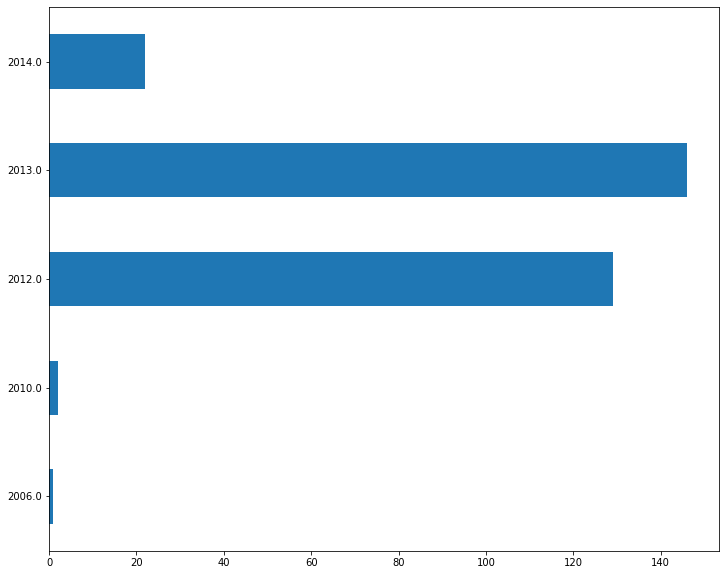

In [27]:
ax3 = dete_resignations['cease_date_updated'].value_counts().sort_index().\
        plot(kind = 'barh', figsize=(12, 10), sort_columns = True)

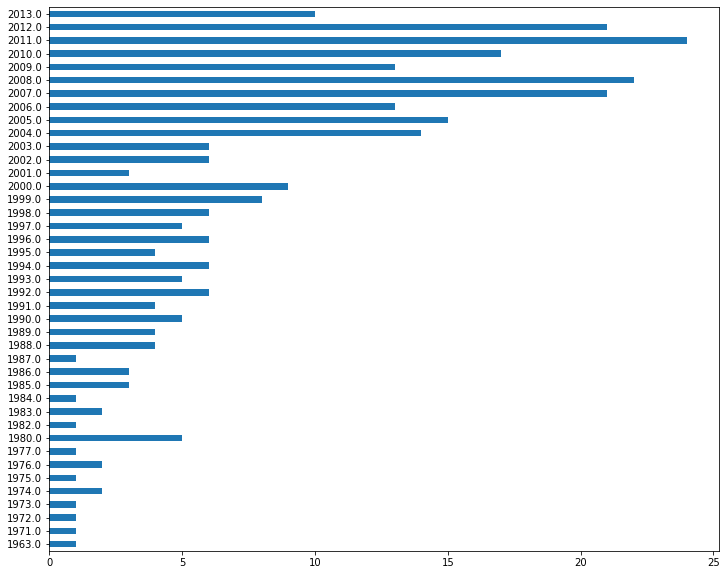

In [28]:
ax3 = dete_resignations['dete_start_date'].value_counts().sort_index().\
        plot(kind = 'barh', figsize=(12, 10), sort_columns = True)

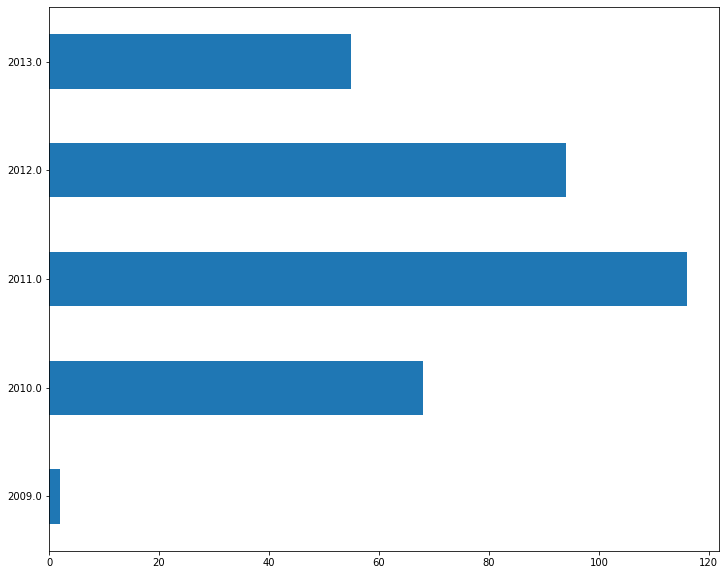

In [29]:
ax5 = tafe_resignations['cease_date'].value_counts().sort_index().\
        plot(kind = 'barh', figsize=(12, 10), sort_columns = True)

as we see values in columns  dete_resignations['cease_date_updated'], dete_resignations['dete_start_date'] and tafe_resignations['cease_date'] have required numeric format.

## 6. Create a New Column

Let's create an institute_service column in dete_resignations and examine it.

In [30]:
dete_resignations['institute_service'] = dete_resignations['cease_date_updated'] - dete_resignations['dete_start_date'] 
dete_resignations['institute_service'].describe() 

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

## 7. Identify Dissatisfied Employees



Let's identify any employees who resigned because they were dissatisfied.
let's evaluate the data in  tafe_resignations dataset. 
### 1. TAFE

In [31]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [32]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

as we see these both columns contain three categories of values - string1='-', string2= 'Contributing Factors. Job Dissatisfaction' or 'Job Dissatisfaction'  and NaN. Hence we can replace string1 to False, string2 to True and NaN to np.nan. 

In [33]:
# Define function for convert NaN to np.nan, '-' to False, other non zero string to True
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

# Create new column and extract converted values from columns 'Contributing Factors. Dissatisfaction' 
# and 'Contributing Factors. Job Dissatisfaction' to 'dissatisfied'
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction',
                                                       'Contributing Factors. Job Dissatisfaction']].\
                                                        applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separation_type                                      340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

and check values in new column 'dissatisfied' in the TAFE

In [34]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

**2. DETE**

We going to extract data from next columns:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload
of dete_resignations dataset to new column dissatisfied using by pandas any() method.

In [35]:
# Define list of columns
dete_res_cols = ['job_dissatisfaction',
           'dissatisfaction_with_the_department',
           'physical_work_environment','lack_of_recognition',
           'lack_of_job_security','work_location',
           'employment_conditions','work_life_balance','workload']
# Extract data of these columns
dete_resignations['dissatisfied'] = dete_resignations[dete_res_cols].any(axis=1, skipna = False)
# Create copy of dataset
dete_resignations_up = dete_resignations.copy()
# Check values on new column 
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Look at summary values for columns in the tafe_resignations - was 332 values in the columns 'Contributing Factors. Dissatisfaction' and "Contributing Factors. Job Dissatisfaction' - became 332 in the column 'dissatisfied' tafe_resignations_up. Set of columns dete_res_cols of  dete_resignations - was 311 values of set, became 311 values in the column  'dissatisfied' in the  dete_resignations_up. Hence extracting and converting values was 
successful.

## 8. Combine the Data

First step add a column to each dataframe that will allow us to easily distinguish between the two.
* 1. Add a column named institute to dete_resignations_up. Each row should contain the value DETE.
* 2. Add a column named institute to tafe_resignations_up. Each row should contain the value TAFE.
Second step - combine the dataframes and assign the result to combined

In [36]:
# Add new columns for both dataset
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
# Comcatenate datasets by rows
combined = pd.concat([dete_resignations_up,tafe_resignations_up], axis = 0, ignore_index=True)
# View combined dataset.
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 54 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   651 non-null    float64
 1   separation_type                                      651 non-null    object 
 2   cease_date                                           635 non-null    object 
 3   dete_start_date                                      283 non-null    float64
 4   role_start_date                                      271 non-null    float64
 5   position                                             598 non-null    object 
 6   classification                                       161 non-null    object 
 7   region                                               265 non-null    object 
 8   business_unit                                        32 non-null     o

Drop any columns  with less than 500 non null values using the DataFrame.dropna() method.

In [37]:
combined_updated = combined.dropna(thresh= 500 , axis = 1)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separation_type    651 non-null    object 
 2   cease_date         635 non-null    object 
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       643 non-null    object 
 9   institute          651 non-null    object 
dtypes: float64(1), object(9)
memory usage: 51.0+ KB


Us we see was 53 columns, remains 9 columns for further analyze.

## 9. Clean the Service Column

Look at institute_service column:

In [38]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

In [39]:
combined_updated['institute_service'].value_counts(dropna = False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
12.0                   6
17.0                   6
10.0                   6
22.0                   6
14.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
39.0                   3
19.0                   3
32.0                   3
21.0                   3
36.0                   2
26.0                   2
28.0                   2
30.0                   2
25.0                   2


In [40]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# changing the type of 'institute_service' to string
combined_updated.loc[ :, ('institute_service')] = combined_updated.loc[ :, ('institute_service')].\
                                                                            astype(str, copy=True)
# Extract number for string to new column 'institute_service_up' usig regular expression pattern
years = r'(\d+)'
combined_updated.insert(loc=10, column = "institute_service_upd",
                        value=combined_updated.loc[ :, ('institute_service')].\
                        str.extract(years, expand = False).astype('float'), allow_duplicates=True)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     651 non-null    float64
 1   separation_type        651 non-null    object 
 2   cease_date             635 non-null    object 
 3   position               598 non-null    object 
 4   employment_status      597 non-null    object 
 5   gender                 592 non-null    object 
 6   age                    596 non-null    object 
 7   institute_service      651 non-null    object 
 8   dissatisfied           643 non-null    object 
 9   institute              651 non-null    object 
 10  institute_service_upd  563 non-null    float64
dtypes: float64(2), object(9)
memory usage: 56.1+ KB


In [41]:
combined_updated["institute_service_upd"].value_counts(dropna = False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
8.0       8
13.0      8
15.0      7
14.0      6
10.0      6
12.0      6
22.0      6
17.0      6
18.0      5
16.0      5
24.0      4
23.0      4
32.0      3
39.0      3
19.0      3
21.0      3
25.0      2
28.0      2
36.0      2
26.0      2
30.0      2
49.0      1
33.0      1
34.0      1
29.0      1
35.0      1
42.0      1
27.0      1
31.0      1
41.0      1
38.0      1
Name: institute_service_upd, dtype: int64

Let's  divide data in  column institute_service_upd as definitions below:

* 1. Novichok: less than 1 year at a company 
* 2. New: Less than 3 years at a company
* 3. Experienced: 3-6 years at a company
* 4. Established: 7-10 years at a company
* 5. Veteran: 11 or more years at a company

categorize the values from the columns column using the definitions above and  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html" target="_blank"> pandas.cut() method</a>.

In [42]:
combined_updated['service_cat'] = pd.cut(combined_updated['institute_service_upd'],
                        bins = [0,1,3,7,10,float("inf")],
                        labels = ['Novichok','New','Experienced','Established','Veteran'],
                        right=False)
combined_updated['service_cat'].value_counts(dropna = False).sort_index()

Novichok        20
New            173
Experienced    172
Established     56
Veteran        142
NaN             88
Name: service_cat, dtype: int64

## 10. Initial Analysis

* 1. Confirm if the number of True and False in the dissatisfied column.

In [43]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

we see NaN vales  and as the great part of the values are False, we have to  fill NaN with True.

In [44]:
combined_updated.loc[ : ,('dissatisfied')] = combined_updated.loc[ :, ('dissatisfied')].fillna(True)
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     248
Name: dissatisfied, dtype: int64

As  we see dissatisfaction people are rough 2/3 of all people. 

* 2. Analyze the share  of dissatisfaction resigned employees  in service category and create pivot table. 

In [45]:
# combined_updated.reset_index(level=0, drop=True,inplace=True)
pvt_dissatified = pd.pivot_table(data = combined_updated,
                                 index = ['service_cat'],
                                 values = 'dissatisfied',
                                 margins = True,
                                 dropna=False)
pvt_dissatified

,dissatisfied
service_cat,
Novichok,0.550000
New,0.265896
Experienced,0.343023
Established,0.553571
Veteran,0.471831
All,0.380952


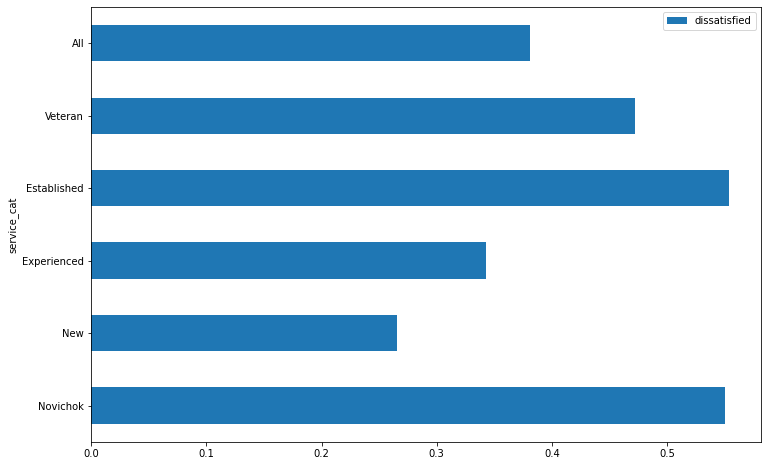

In [46]:
ax = pvt_dissatified.plot(kind = 'barh', figsize = (12,8) );

As we see the most of  issues are in the Novichok, Veteran, Established categories.
Lets analyze dispersions by DETE and TAFE - create pivot table and plot.




In [47]:
pvt_dissatified_org = pd.pivot_table(data = combined_updated,
                                 index = ['service_cat', 'institute'],
                                 values = 'dissatisfied',
                                 margins = True,
                                 dropna=False)
pvt_dissatified_org

dissatisfied
service_cat institute              
Novichok    DETE           0.550000
            TAFE                NaN
New         DETE           0.277778
            TAFE           0.262774
Experienced DETE           0.460526
            TAFE           0.250000
Established DETE           0.685714
            TAFE           0.333333
Veteran     DETE           0.537736
            TAFE           0.277778
All                        0.380952

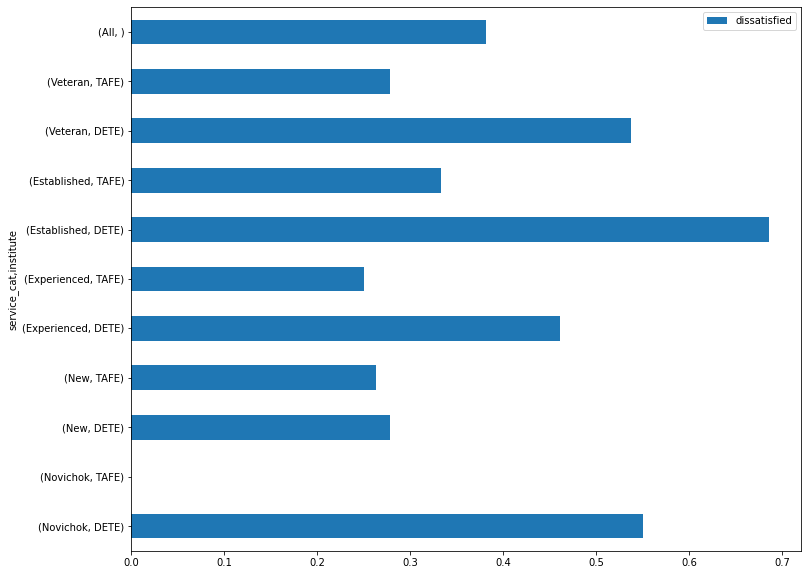

In [48]:
ax = pvt_dissatified_org.plot(kind = 'barh', figsize = (12,10));

Us we see dissatisfaction of work resigned employees on DATE by three - four times more than employees on TAFE.
In fact all categories of resigned employees had   dissatisfaction of work in DATE.
The dispersions of dissatisfaction of work resigned employees from TAFE has almost evenly by all categories.

* 3. Analyze age of dissatisfaction resigned employees in service category.
Let's view column age 

In [49]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Carefully look at the values in the age column  - us we see some ages category have different name. 
Rename values contains of column age with dictionary for avoiding duplicates.

In [50]:
# Dictionary for rename ages
rename_ages = {"20 or younger": "20-=<" , "21  25": "21-25",
               "26  30": "26-30", "31  35" : "31-35", "36  40": "36-40",
               "41  45": "41-45", "46  50" : "46-50", "56 or older": "56-60",
               "61 or older": "60->= "}
combined_updated["age"].replace (rename_ages, inplace=True)
combined_updated['age'].value_counts(dropna = False).sort_index()

20-=<     10
21-25     62
26-30     67
31-35     61
36-40     73
41-45     93
46-50     81
51-55     71
56-60     55
60->=     23
NaN       55
Name: age, dtype: int64

As we see we have 55 NaN values. Drop it.

In [51]:
combined_updated.dropna(subset=['age'], inplace = True)
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 650
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     596 non-null    float64 
 1   separation_type        596 non-null    object  
 2   cease_date             583 non-null    object  
 3   position               593 non-null    object  
 4   employment_status      594 non-null    object  
 5   gender                 590 non-null    object  
 6   age                    596 non-null    object  
 7   institute_service      596 non-null    object  
 8   dissatisfied           596 non-null    bool    
 9   institute              596 non-null    object  
 10  institute_service_upd  561 non-null    float64 
 11  service_cat            561 non-null    category
dtypes: bool(1), category(1), float64(2), object(8)
memory usage: 52.6+ KB


In [52]:
pvt_dissatified_age = pd.pivot_table(data = combined_updated,
                                 index = ['age', 'institute'],
                                 values = ['dissatisfied'], 
                                 margins = True,
                                 dropna=False)
pvt_dissatified_age 

dissatisfied
age    institute              
20-=<  DETE           0.000000
       TAFE           0.222222
21-25  DETE           0.310345
       TAFE           0.303030
26-30  DETE           0.571429
       TAFE           0.250000
31-35  DETE           0.551724
       TAFE           0.218750
36-40  DETE           0.390244
       TAFE           0.281250
41-45  DETE           0.479167
       TAFE           0.266667
46-50  DETE           0.452381
       TAFE           0.307692
51-55  DETE           0.593750
       TAFE           0.282051
56-60  DETE           0.576923
       TAFE           0.206897
60->=  DETE           0.521739
       TAFE                NaN
All                   0.379195

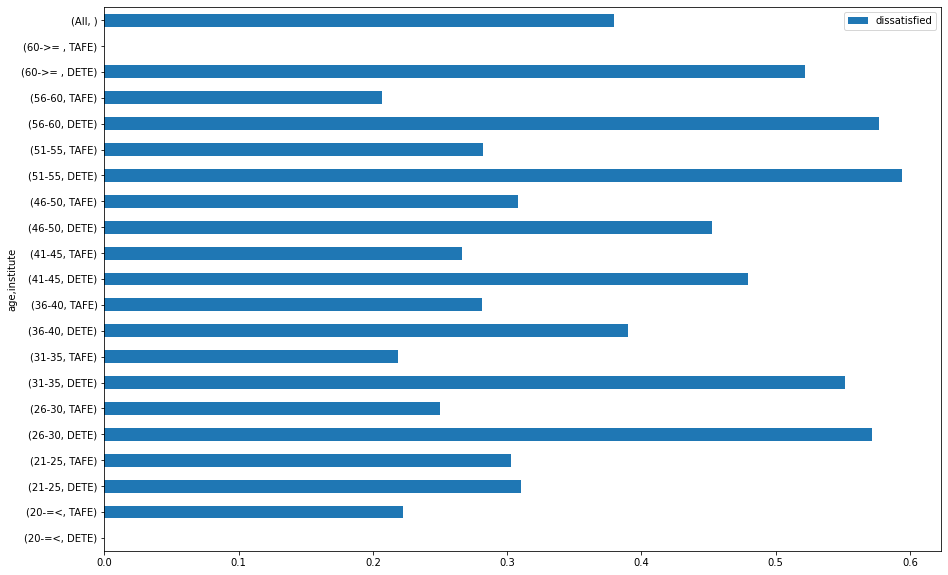

In [53]:
pvt_dissatified_age.plot(kind = 'barh', figsize = (15, 10));

In [54]:
pvt_dissatified_age1 = pd.pivot_table(data = combined_updated,
                                 index = ['age', 'institute'],
                                 values = [ 'dissatisfied'], 
                                 margins = True,
                                 dropna=False)
pvt_dissatified_age1 

dissatisfied
age    institute              
20-=<  DETE           0.000000
       TAFE           0.222222
21-25  DETE           0.310345
       TAFE           0.303030
26-30  DETE           0.571429
       TAFE           0.250000
31-35  DETE           0.551724
       TAFE           0.218750
36-40  DETE           0.390244
       TAFE           0.281250
41-45  DETE           0.479167
       TAFE           0.266667
46-50  DETE           0.452381
       TAFE           0.307692
51-55  DETE           0.593750
       TAFE           0.282051
56-60  DETE           0.576923
       TAFE           0.206897
60->=  DETE           0.521739
       TAFE                NaN
All                   0.379195

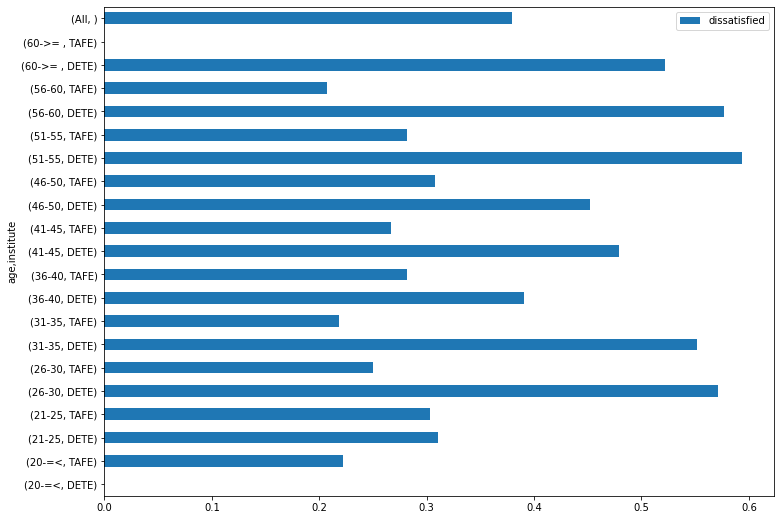

In [55]:
pvt_dissatified_age1.plot(kind = 'barh', figsize = (12,9)) ;

As we see general representation  dispersion of dissatisfaction resigned employees by age  for DATE and TAFE seems at the dissatisfaction resigned employ in service category in the p.p No 10.2.

* 4. Analyze the age and service category  of dissatisfaction resigned employees for different institutes.

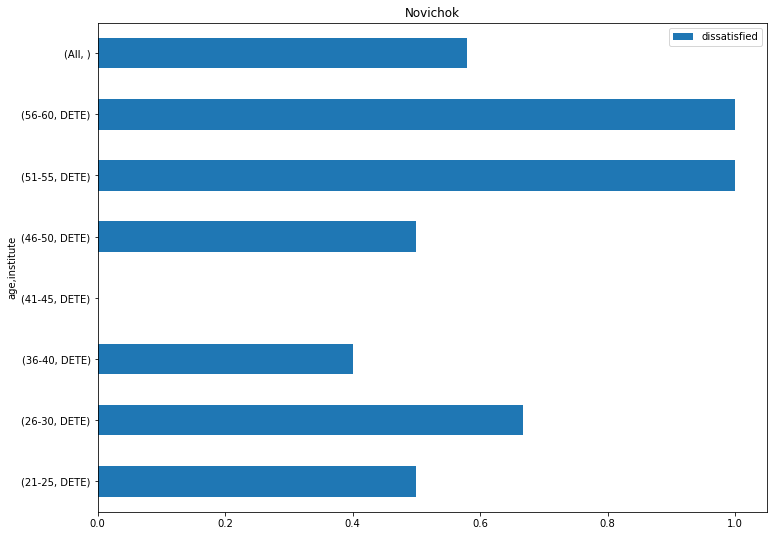

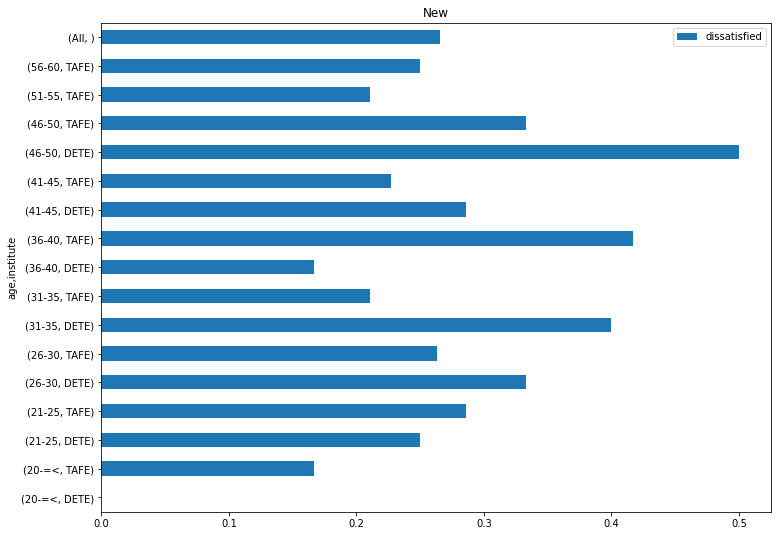

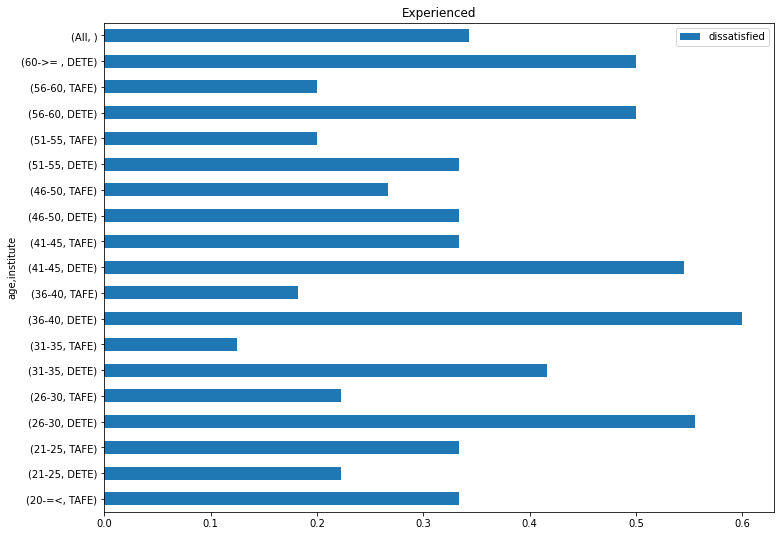

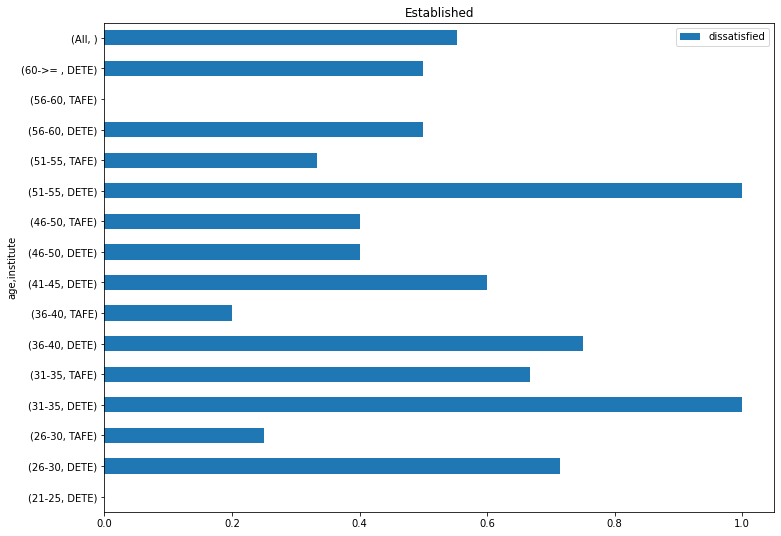

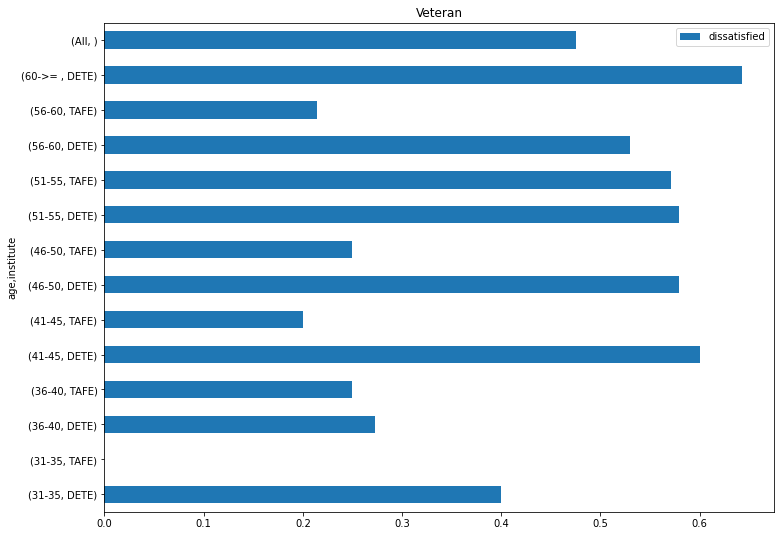

In [56]:
# create service category list 
service_category = ['Novichok','New','Experienced','Established','Veteran']
# Loop for printing or plot pivot tables
for category in service_category :
    #create a df filtering by cat
    current_df = combined_updated[combined_updated['service_cat'] == category]
    pvt_age = pd.pivot_table(data = current_df,
                              index = ['age','institute'],
                              values = 'dissatisfied',
                              margins = True,
                              dropna=True)
    pvt_age.plot(kind = 'barh', title = category, figsize = (12,9));

## Conclusion

How we see:

* 1. All category by age or time of servicing  from reassigned employees of  DATE had  the highest  level of dissatisfaction of working in than TAFE.

* 2. In the general average the level  of  dissatisfaction by age  for  reassigned employees of  TAFE less then DATE on one and half  - four times. Maximal levels of dissatisfaction for  reassigned employees of TAFE  - age 36 - 40 and 46 - 50 years.
* 3. For category of time service for TAFE and age we have maximal levels of dissatisfaction for these groups:
*     New - 36 - 40 year.
*     Experienced - <= 20, 21 - 25, 41 - 45 year.
*     Established - 31 - 35 year.
*     Veteran 51 - 55 year.
* 4. For category of time serice and age for DETE we have maximal level of of dissatisfaction for these groups:
*     Novichok  - 51 - 55, 55 - 60 year.
*     New - 46 – 50, 36-40, 31 – 35 year.
*     Experienced - 6-40, 26-30, 41-45, 56-60,60->=   year.
*     Established - 31 – 35, 51-55. 36 -40 year.
*     Veteran 60->=, 41-45, 46 - 50, 51 -55 year.

We haven't detailed information about reason of reassignment for each employees in the combined dataset and can't say exactly about these reasons. Detailed information about reason dissatisfaction contained in the original DETE dataset but for for compatibility with TAFE is  has been simplified.

May be reasons on low salary, high  load, lack of social elevator, terrible psychological climate, 
a lot of writing the  unnecessary reporting - but we can't assert something from above haven't reliable data of these reasons.

Created on Feb 20, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 10

Python 3.8.7

required next preinstalled python modules:

matplotlib

numpy 

pandas 